In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from statistics import stdev
from functions import event_probability 

In [ ]:
# Load csv 
df_train = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

# Create new column (Survived) in raw test data with a value of 0 on each row
df_test_raw['Survived'] = 0

In [ ]:
# Show the given row and columns in the datasets
shape_train = df_train.shape
shape_test = df_test_raw.shape
print('Train dataset shape: ')
print(shape_train)
print('Test dataset shape: ')
print(shape_test)

In [ ]:
# Show all info of the datasets
df_train.info()
df_test_raw.info()

In [ ]:
display(df_train)

In [ ]:
# Show total of people onboard
total = df_train['PassengerId'].count() # 891

In [ ]:
# Show total number of male and female onboard of the ship
df_train['Sex'].value_counts()

In [ ]:
# Show null values per column
df_train.isnull().sum()

In [ ]:
sex = df_train.groupby('Sex')

male_pass = sex.get_group('male')
female_pass = sex.get_group('female')

In [ ]:
# Gives the age thats most common amongst men onboard
male_pass.Age.mode()


In [ ]:
# Create bins to fit an age range to every passenger
bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 120]
bin_labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-50', '50-54', '55-59', '60+']

# Cut age into age groups so you can view it better
df_train['Agerange'] = pd.cut(df_train.Age, bins, labels = bin_labels,include_lowest = True)


In [ ]:
# Shows how many male passengers did not survive
not_surv_male_pass = male_pass[(male_pass['Survived'] == 0)]
count_not_surv_male_pass = not_surv_male_pass.PassengerId.count() # 468


In [ ]:
# Shows how many male passengers did survive
surv_male_pass = male_pass[(male_pass['Survived'] == 1)]
count_surv_male_pass = surv_male_pass.PassengerId.count() # 109

In [ ]:
# Group male passengers by survived or not to plot the results
male_pass_graph = male_pass.groupby('Survived').Survived.count()


In [ ]:
# Gives the age thats most common amongst women onboard
female_pass.Age.mode()

In [ ]:
# Shows how many female passengers did not survive
not_surv_female_pass = female_pass[(female_pass['Survived'] == 0)]
count_not_surv_female_pass = not_surv_female_pass.PassengerId.count() # 81

In [ ]:
# Shows how many female passengers did survive
surv_female_pass = female_pass[(female_pass['Survived'] == 1)]
count_surv_female_pass = surv_female_pass.PassengerId.count() # 233


In [ ]:
# Group female passengers by survived or not to plot the results
female_pass_graph = female_pass.groupby('Survived').Survived.count()

In [ ]:
# Total of people who survived
total_surv = df_train[(df_train['Survived'] == 1)]
total_not_surv = df_train[(df_train['Survived'] == 0)]

In [ ]:
# Group survivers by sex
groupby_sex_surv = total_surv.groupby('Sex').Survived.count()
groupby_sex_not_surv = total_not_surv.groupby('Sex').Survived.count()

In [ ]:
# Graphing surviving and non surviving females
fig, ax = plt.subplots(1, 2, figsize=(8,8))

ax[0].pie(male_pass_graph.values, labels=['Died', 'Survived'], autopct='%.2f%%')
ax[0].set_title('Male passengers that died')
ax[1].pie(female_pass_graph.values, labels=['Died', 'Survived'], autopct='%.2f%%')
ax[1].set_title('Female passengers that died')
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
# Probability for surviving as a female
prob_surv_female = event_probability(count_surv_female_pass, total)
print('Probability for surviving as a female: ' + str(prob_surv_female) + '%')

# Probability for not surviving as a female
prob_not_surv_female = event_probability(count_not_surv_female_pass, total)
print('Probability for not surviving as a female: ' + str(prob_not_surv_female) + '%')


In [ ]:
# Probability for surviving as a male
prob_surv_male = event_probability(count_surv_male_pass, total)
print('Probability for surviving as a male: ' + str(prob_surv_male) + '%')

# Probability for not surviving as male
prob_not_surv_male = event_probability(count_not_surv_male_pass, total)
print('Probability for not surviving as male: ' + str(prob_not_surv_male) + '%')

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_train.Pclass)
plt.xticks(range(1,4,1))
plt.yticks(range(100,550,50))
plt.xlabel('Travel class', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
plt.show()

In [ ]:
classes = df_train.groupby('Pclass')

first = classes.get_group(1)
second = classes.get_group(2)
third = classes.get_group(3)

/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2401349821.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Died', 'Survived'])
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2401349821.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Died', 'Survived'])
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2401349821.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['Died', 'Survived'])


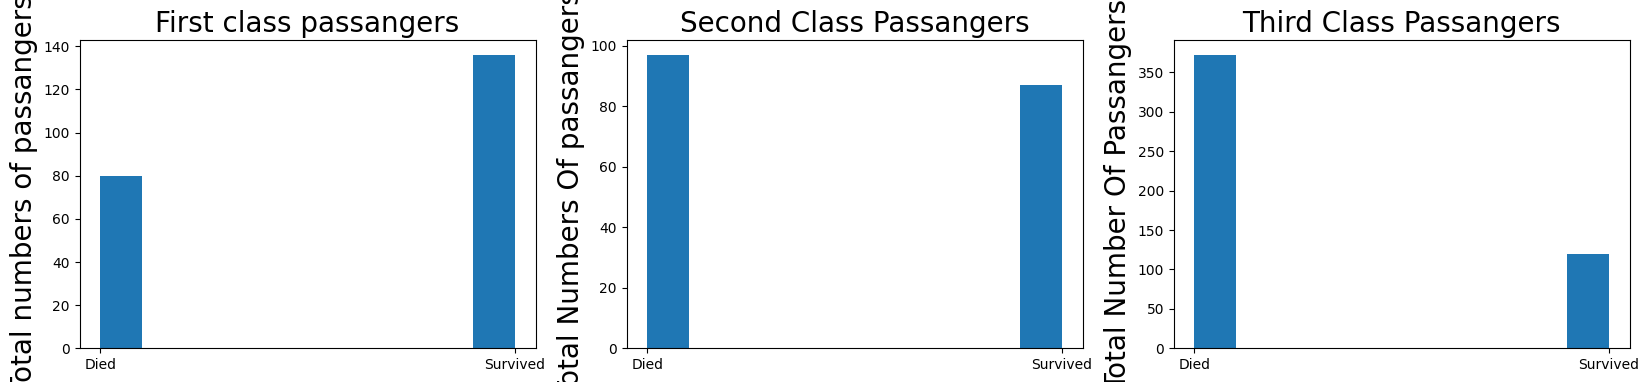

In [200]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
ax[0].hist(first.Survived)
ax[0].set_title("First class passangers",fontsize = 20)
ax[0].set_ylabel("Total numbers of passangers",fontsize = 20)
ax[0].set_xticklabels(['Died', 'Survived'])
ax[0].set_xticks(range(0,2,1))

ax[1].hist(second.Survived)
ax[1].set_title("Second Class Passangers",fontsize = 20)
ax[1].set_ylabel("Total Numbers Of passangers",fontsize = 20)
ax[1].set_xticklabels(['Died', 'Survived'])
ax[1].set_xticks(range(0,2,1))

ax[2].hist(third.Survived)
ax[2].set_title("Third Class Passangers",fontsize = 20)
ax[2].set_ylabel("Total Number Of Passangers",fontsize = 20)
ax[2].set_xticklabels(['Died', 'Survived'])
ax[2].set_xticks(range(0,2,1))

plt.show()

In [205]:
female_pass_class = female_pass.groupby('Pclass')

female_first = female_pass_class.get_group(1)
female_second = female_pass_class.get_group(2)
female_third = female_pass_class.get_group(3)

In [210]:
female_first_group = female_first.groupby('Survived')
female_second_group = female_second.groupby('Survived')
female_third_group = female_third.groupby('Survived')

female_first_surv = female_first_group.get_group(1)
female_first_not_surv = female_first_group.get_group(0)

female_second_surv = female_second_group.get_group(1)
female_second_not_surv = female_second_group.get_group(0)

female_third_surv = female_third_group.get_group(1)
female_third_not_surv = female_third_group.get_group(0)


/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/3926617801.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Died', 'Survived'])
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/3926617801.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Died', 'Survived'])
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/3926617801.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['Died', 'Survived'])


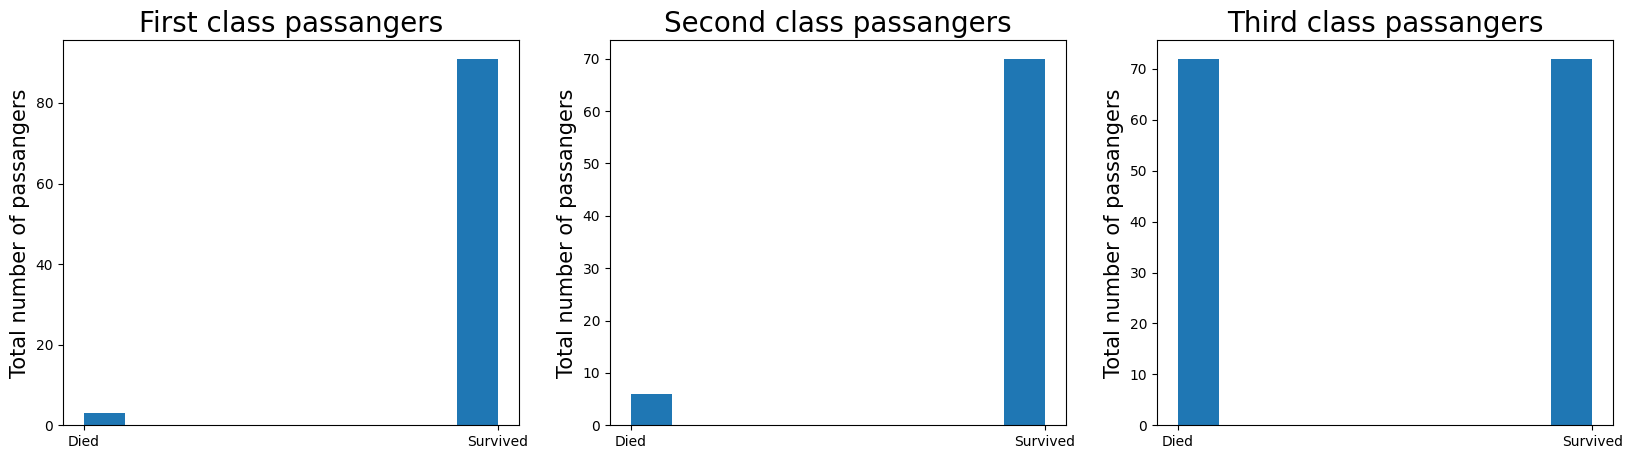

In [207]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].hist(female_first.Survived)
ax[0].set_title("First class passangers",fontsize = 20)
ax[0].set_ylabel("Total number of passangers",fontsize = 15)
ax[0].set_xticklabels(['Died', 'Survived'])
ax[0].set_xticks(range(0,2,1))

ax[1].hist(female_second.Survived)
ax[1].set_title("Second class passangers",fontsize = 20)
ax[1].set_ylabel("Total number of passangers",fontsize = 15)
ax[1].set_xticklabels(['Died', 'Survived'])
ax[1].set_xticks(range(0,2,1))

ax[2].hist(female_third.Survived)
ax[2].set_title("Third class passangers",fontsize = 20)
ax[2].set_ylabel("Total number of passangers",fontsize = 15)
ax[2].set_xticklabels(['Died', 'Survived'])
ax[2].set_xticks(range(0,2,1))

plt.show()

In [ ]:
#Create title feature from name
df_train['Title'] = df_train.Name.str.split(', ').str[1]
df_train['Title'] = df_train.Title.str.split('. ').str[0]

df_test_raw['Title'] = df_test_raw.Name.str.split(', ').str[1]
df_test_raw['Title'] = df_test_raw.Title.str.split('. ').str[0]
df_train['Title'].value_counts()


In [ ]:
# Create new dataframe that only contains de PassengerId and Survived columns
data = df_test_raw[['PassengerId', 'Survived']]

# Display the new dataframe
display(data)

# Create a csv file of the dataframe called result
# data.to_csv('result.csv', index=False)